## a)

In [215]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

np.random.seed(412)

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features
y = iris.target  # Target classes

# 1. Probability-based classifier: Logistic Regression
log_reg = LogisticRegression(multi_class='multinomial', max_iter=200)
log_reg.fit(X, y)
y_pred_log_reg = log_reg.predict(X)

# Standardizing the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 2. Non-probability-based classifier: k-Nearest Neighbors (k=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)
y_pred_knn = knn.predict(X)

/home/timryall/repos/uq/STAT3006/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [216]:
X_df = pd.DataFrame(iris.data, columns=iris.feature_names)
X_df['True Class'] = y

# Logistic Regression: Extracting parameter estimates (coefficients)
log_reg_coefficients = pd.DataFrame(log_reg.coef_, columns=iris.feature_names, index=iris.target_names)
log_reg_coefficients['Intercept'] = log_reg.intercept_
X_df['Predicted Class (LG)'] = y_pred_log_reg

# k-NN: Summarizing the observations classified into each class
X_df['Predicted Class (k-NN)'] = y_pred_knn


# Numerical summary of the features for each predicted class (mean and std dev)
knn_summary = X_df.groupby('Predicted Class (k-NN)').agg(['mean', 'std']).reset_index()
lg_summary = X_df.groupby('Predicted Class (LG)').agg(['mean', 'std']).reset_index()

log_reg_coefficients

#knn_summary, lg_summary

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Intercept
setosa,-0.424566,0.966643,-2.515546,-1.082169,9.854942
versicolor,0.535411,-0.320739,-0.207406,-0.942632,2.231174
virginica,-0.110845,-0.645903,2.722953,2.024801,-12.086117


In [217]:
from collections import Counter

print(f"{Counter(y_pred_log_reg)=}")
print(f"{Counter(y_pred_knn)=}")

lg_prop  = {clas: coun / len(y_pred_log_reg) for clas, coun in Counter(y_pred_log_reg).items()}
knn_prop  = {clas: coun / len(y_pred_knn) for clas, coun in Counter(y_pred_knn).items()}

print(f"{lg_prop=}")
print(f"{knn_prop=}")

Counter(y_pred_log_reg)=Counter({np.int64(2): 52, np.int64(0): 50, np.int64(1): 48})
Counter(y_pred_knn)=Counter({np.int64(1): 51, np.int64(0): 50, np.int64(2): 49})
lg_prop={np.int64(0): 0.3333333333333333, np.int64(1): 0.32, np.int64(2): 0.3466666666666667}
knn_prop={np.int64(0): 0.3333333333333333, np.int64(1): 0.34, np.int64(2): 0.32666666666666666}


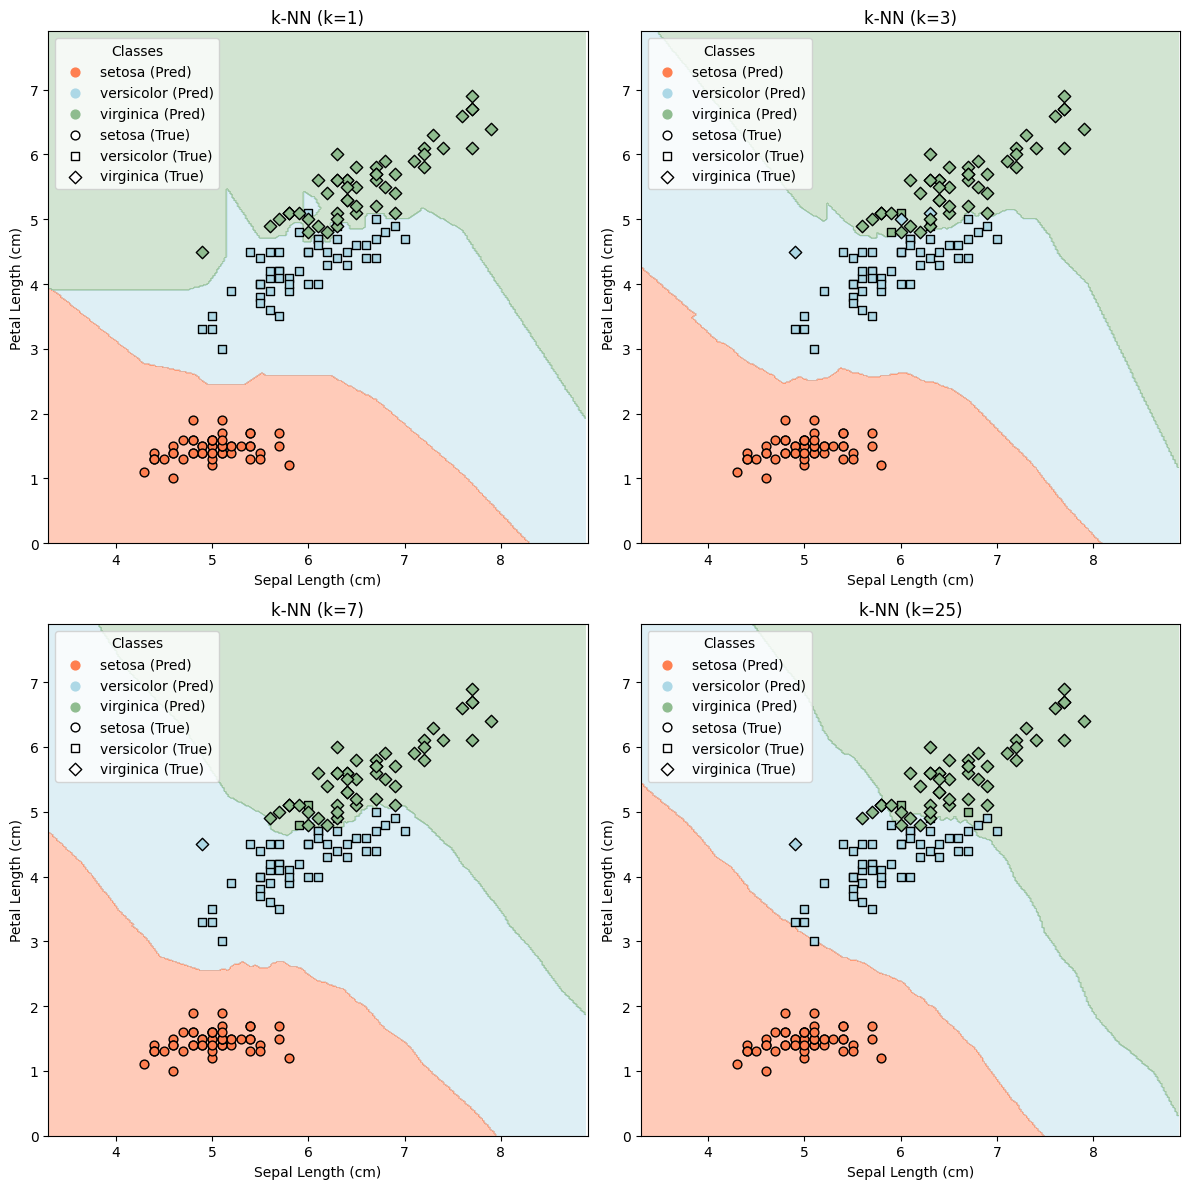

In [218]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

# Load Iris dataset
iris = load_iris()
X = iris.data[:, :4]  # Use only the first two features
y = iris.target
class_names = iris.target_names  # Class names (Setosa, Versicolor, Virginica)

# Colors and marker shapes
colours = ('coral', 'lightblue', 'darkseagreen')  # Colors for predicted classes
markers = ['o', 's', 'D']  # Different shapes for true classes (circle, square, diamond)

# Setup mesh grid for plotting decision boundaries
def plot_decision_boundary(X, y, model, ax, title, y_pred):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Standardize features for the model
    scaler = StandardScaler()
    X_std = scaler.fit_transform(X)

    # Fit the model
    model.fit(X_std, y)
    
    # Predict the class for every point in the mesh grid
    Z = model.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    ax.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(colours))
    
    # Plot the actual data points with real class labels (shapes indicate real classes)
    for i, point in enumerate(X):
        ax.scatter(point[0], point[1], 
                   c=np.array([colours[y_pred[i]]]), edgecolors='k', marker=markers[y[i]], s=40)

    # Add predicted and true classes to the legend
    for i, class_idx in enumerate(np.unique(y_pred)):
        ax.scatter(-10, -10, s=40,
                   c=[colours[class_idx]], label=class_names[class_idx] + " (Pred)")
        
    for i, class_idx in enumerate(np.unique(y)):
        ax.scatter(-10, -10, s=40,
                   marker=markers[class_idx], c=['white'], edgecolors='k', label=class_names[class_idx] + " (True)")
        
    # Add labels and title
    ax.set_xlabel('Sepal Length (cm)')
    ax.set_ylabel('Petal Length (cm)')
    ax.set_title(title)

    # Set axis limits
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    
    # Create a legend with true class labels
    ax.legend(title="Classes")

# Iterate over different k values and plot
k_values = [1, 3, 7, 25]
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for row, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)

    # Plot decision boundary for the current k value
    plot_decision_boundary(X[:, [0,2]], y, knn, axes[row // 2, row % 2], f'k-NN (k={k})', y_pred)

# Show plot
plt.tight_layout()
plt.show()


## b)

In [219]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

from statsmodels.stats.proportion import proportion_confint


# 10-fold cross-validation setup
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# 1. Logistic Regression: Cross-validation error rates
log_reg_cv_scores = cross_val_score(log_reg, X, y, cv=kf, scoring='accuracy')
log_reg_error_rate = 1 - np.mean(log_reg_cv_scores)

# 2. k-NN: Cross-validation error rates
knn_cv_scores = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')
knn_error_rate = 1 - np.mean(knn_cv_scores)

# Calculating confidence intervals for overall error rates
log_reg_ci = proportion_confint(count=log_reg_error_rate* len(y), nobs= len(y), method='wilson')
knn_ci = proportion_confint(count=knn_error_rate* len(y), nobs= len(y), method='wilson')

# Class-specific error rates (confusion matrix approach within cross-validation)
from sklearn.metrics import confusion_matrix

# Initialize accumulators for class-specific error rates
log_reg_class_errors = np.zeros(3)
knn_class_errors = np.zeros(3)
class_counts = np.zeros(3)

# Performing manual 10-fold cross-validation to accumulate class-specific errors
for train_index, test_index in kf.split(X):
    # Train and test sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Logistic Regression
    log_reg.fit(X_train, y_train)
    y_pred_log = log_reg.predict(X_test)
    
    # k-NN
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    
    # Confusion matrices
    log_reg_cm = confusion_matrix(y_test, y_pred_log)
    knn_cm = confusion_matrix(y_test, y_pred_knn)
    #print(knn_cm)
    
    # Update class-specific error rates
    log_reg_class_errors += np.sum(log_reg_cm, axis=1) - np.diag(log_reg_cm)
    knn_class_errors += np.sum(knn_cm, axis=1) - np.diag(knn_cm)
    class_counts += np.sum(log_reg_cm, axis=1)

# Class-specific error rates
log_reg_class_error_rates = log_reg_class_errors / class_counts
knn_class_error_rates = knn_class_errors / class_counts

# Confidence intervals for class-specific error rates
log_reg_class_cis = [proportion_confint(count=err*class_counts[i], nobs=class_counts[i], method='wilson') for i, err in enumerate(log_reg_class_error_rates)]
knn_class_cis = [proportion_confint(count=err*class_counts[i], nobs=class_counts[i], method='wilson') for i, err in enumerate(knn_class_error_rates)]

print(f"{log_reg_error_rate=}")
print(f"{log_reg_ci=}")
print(f"{log_reg_class_error_rates=}")
print(f"{log_reg_class_cis=}")
print(f"{knn_error_rate=}")
print(f"{knn_ci=}")
print(f"{knn_class_error_rates=}")
print(f"{knn_class_cis=}")



/home/timryall/repos/uq/STAT3006/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/timryall/repos/uq/STAT3006/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/timryall/repos/uq/STAT3006/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/timryall/repos/uq/STAT3006/.venv/lib/python3.12/site-pa

log_reg_error_rate=np.float64(0.026666666666666616)
log_reg_ci=(0.010417940822967958, 0.06655389051214447)
log_reg_class_error_rates=array([0.  , 0.06, 0.02])
log_reg_class_cis=[(0.0, 0.07134759913335874), (0.020614970348973943, 0.16217091688838173), (0.003539259271646236, 0.10495443589637815)]
knn_error_rate=np.float64(0.04666666666666652)
knn_ci=(0.022786549161261875, 0.09318647239912731)
knn_class_error_rates=array([0.  , 0.04, 0.1 ])
knn_class_cis=[(0.0, 0.07134759913335874), (0.011038884327619819, 0.13460090687507023), (0.0434757649318904, 0.21360231437479657)]


/home/timryall/repos/uq/STAT3006/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/timryall/repos/uq/STAT3006/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/timryall/repos/uq/STAT3006/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/timryall/repos/uq/STAT3006/.venv/lib/python3.12/site-pa

## c)

In [220]:
import pandas as pd
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['True Class'] = y

# Perform 10-fold cross-validation for Logistic Regression and k-NN
log_reg = LogisticRegression(multi_class='multinomial',  max_iter=200)
knn = KNeighborsClassifier(n_neighbors=3)

# Generate cross-validated predictions
log_reg_pred = cross_val_predict(log_reg, X, y, cv=10)
knn_pred = cross_val_predict(knn, X, y, cv=10)

# Add predicted class columns to dataframe
iris_df['Logistic Regression Pred'] = log_reg_pred
iris_df['k-NN Pred'] = knn_pred

# Identify misclassified observations
log_reg_misclassified = iris_df[iris_df['True Class'] != iris_df['Logistic Regression Pred']]
knn_misclassified = iris_df[iris_df['True Class'] != iris_df['k-NN Pred']]

# Display misclassified observations for both models
log_reg_misclassified_list = log_reg_misclassified[['sepal length (cm)', 'sepal width (cm)', 
                                                    'petal length (cm)', 'petal width (cm)', 
                                                    'True Class', 'Logistic Regression Pred']]

knn_misclassified_list = knn_misclassified[['sepal length (cm)', 'sepal width (cm)', 
                                            'petal length (cm)', 'petal width (cm)', 
                                            'True Class', 'k-NN Pred']]

print("Logistic Regression Misclassifications:")
print(log_reg_misclassified_list)

print("\nk-NN Misclassifications:")
print(knn_misclassified_list)

# Confusion matrices for both models
log_reg_cm = confusion_matrix(y, log_reg_pred)
knn_cm = confusion_matrix(y, knn_pred)

print("\nLogistic Regression Confusion Matrix:")
print(log_reg_cm)

print("\nk-NN Confusion Matrix:")
print(knn_cm)


/home/timryall/repos/uq/STAT3006/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/timryall/repos/uq/STAT3006/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Misclassifications:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
70                 5.9               3.2                4.8               1.8   
77                 6.7               3.0                5.0               1.7   
83                 6.0               2.7                5.1               1.6   
106                4.9               2.5                4.5               1.7   

     True Class  Logistic Regression Pred  
70            1                         2  
77            1                         2  
83            1                         2  
106           2                         1  

k-NN Misclassifications:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
70                 5.9               3.2                4.8               1.8   
72                 6.3               2.5                4.9               1.5   
83                 6.0               2.7                5.1      

/home/timryall/repos/uq/STAT3006/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/timryall/repos/uq/STAT3006/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/timryall/repos/uq/STAT3006/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/timryall/repos/uq/STAT3006/.venv/lib/python3.12/site-pa

## d)

/home/timryall/repos/uq/STAT3006/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/timryall/repos/uq/STAT3006/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/timryall/repos/uq/STAT3006/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/timryall/repos/uq/STAT3006/.venv/lib/python3.12/site-pa

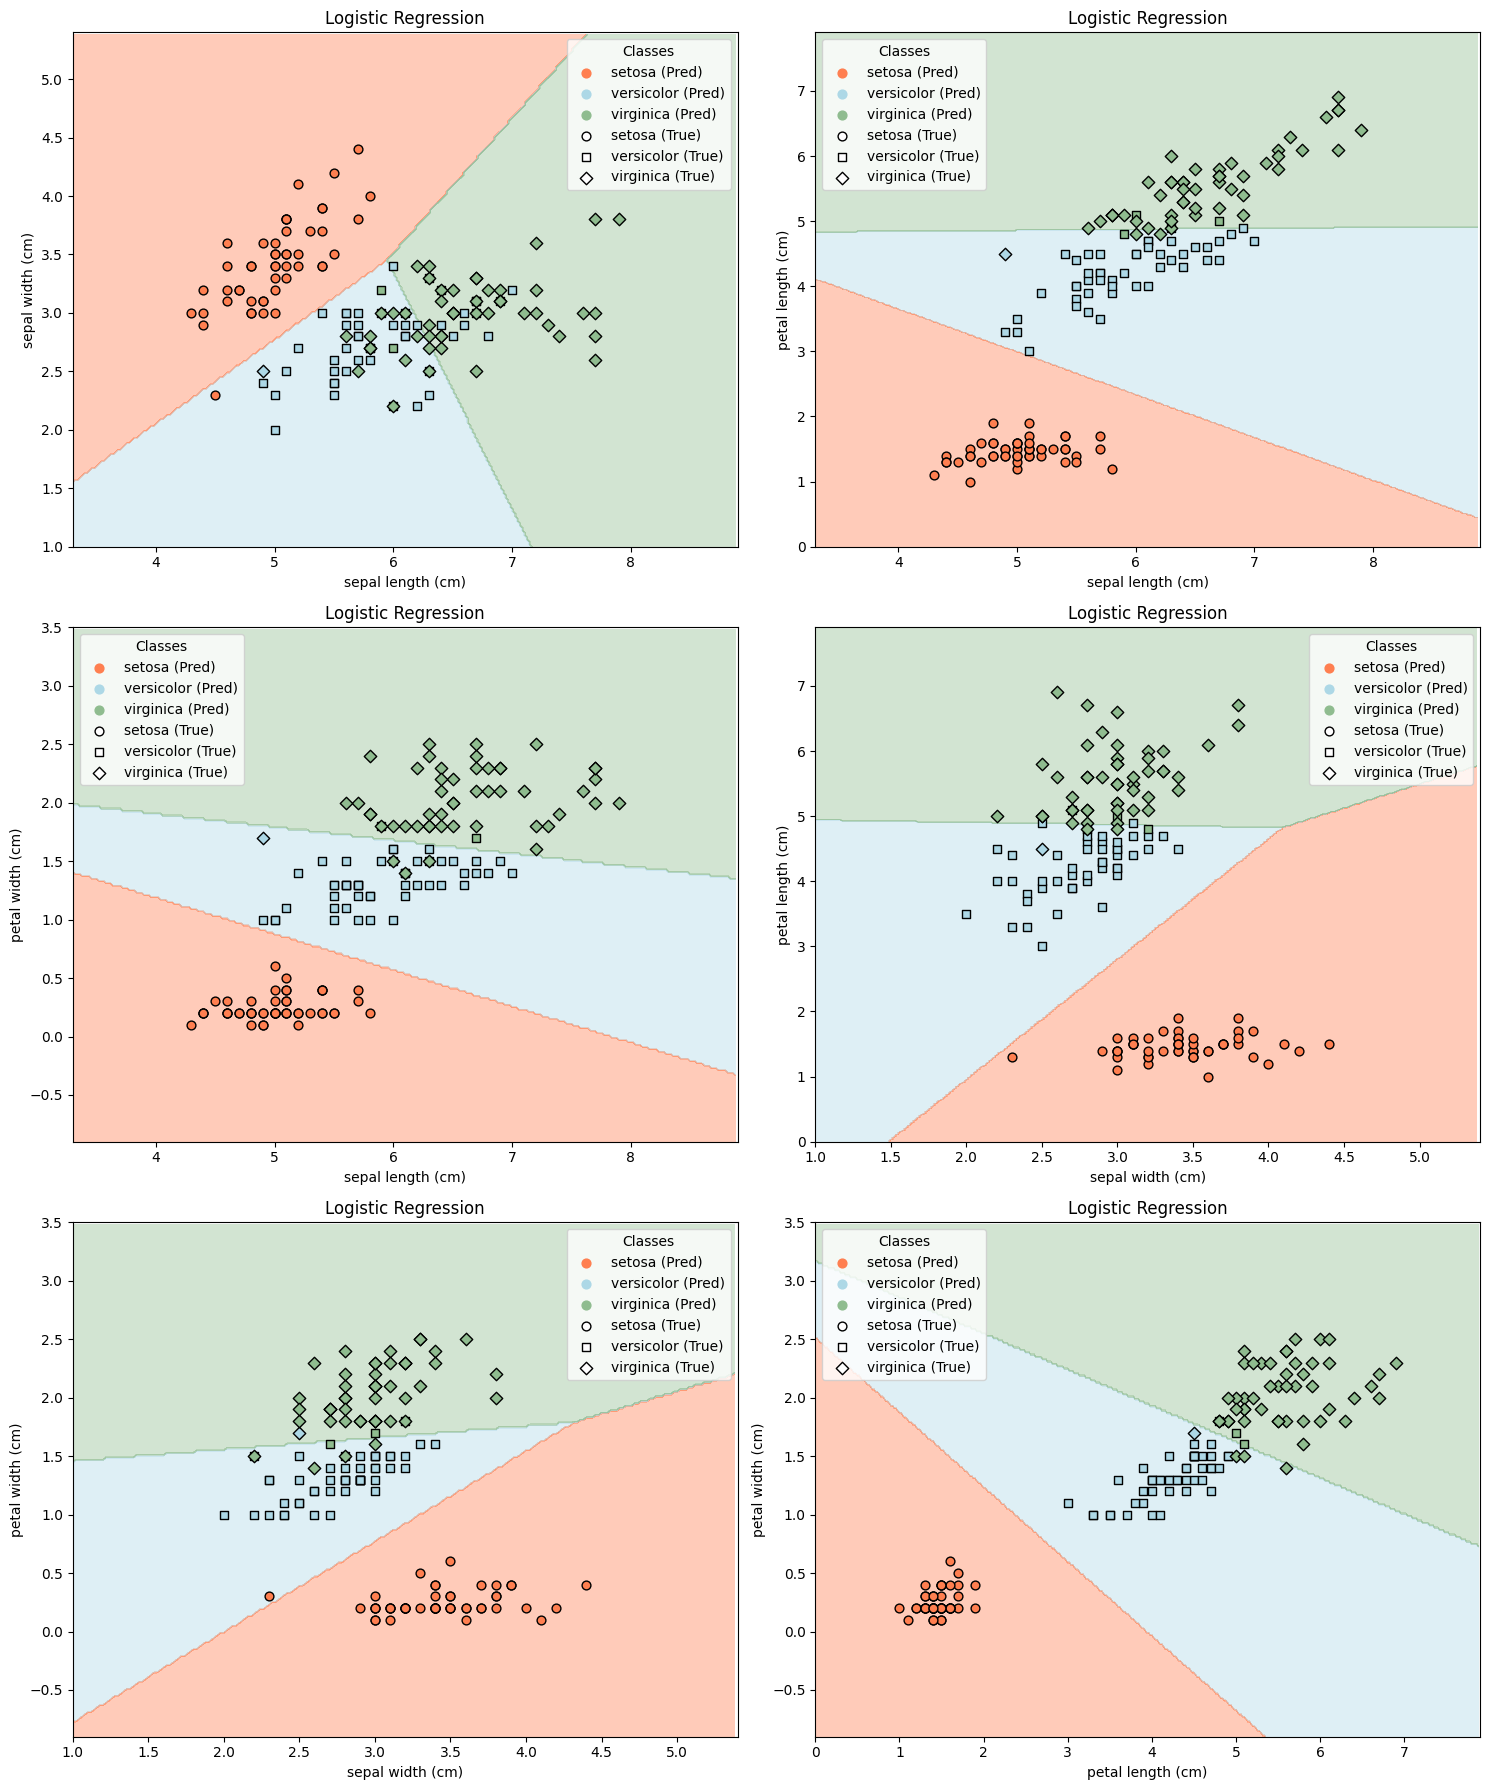

In [221]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
class_names = iris.target_names  # Class names (Setosa, Versicolor, Virginica)

# Define the classifier
log_reg = LogisticRegression(multi_class='multinomial',  max_iter=200)

# List of unique pairs of explanatory variables
pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

# Colors and marker shapes
colours = ('coral', 'lightblue', 'darkseagreen')  # Colors for predicted classes
markers = ['o', 's', 'D']  # Different shapes for true classes (circle, square, diamond)

# Setup mesh grid for plotting decision boundaries
def plot_decision_boundary(X, y, model, ax, feature_x, feature_y, title, y_pred):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Standardize features for the model
    scaler = StandardScaler()
    X_std = scaler.fit_transform(X)

    # Fit the model on this feature pair
    model.fit(X_std, y)
    
    # Predict the class for every point in the mesh grid
    Z = model.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    ax.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(colours))
    
    # Plot the actual data points with real class labels (shapes indicate real classes)
    for i, point in enumerate(X):
        ax.scatter(point[0], point[1], 
                   c=np.array([colours[y_pred[i]]]), edgecolors='k', marker=markers[y[i]], s=40)
    

    for i, class_idx in enumerate(np.unique(y_pred)):
        ax.scatter(-10, -10, s=40,
                   c=[colours[class_idx]], label=class_names[class_idx] + " (Pred)")
        
        
    for i, class_idx in enumerate(np.unique(y)):
        ax.scatter(-10, -10, s=40,
                   marker=markers[class_idx], c=['white'], edgecolors='k', label=class_names[class_idx] + " (True)")
        
    # Add labels and title
    ax.set_xlabel(feature_x)
    ax.set_ylabel(feature_y)
    ax.set_title(title)

        # Set axis limits
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    
    # Create a legend with true class labels
    ax.legend(title="Classes")



# Plot decision boundaries for each pair of features
fig, axes = plt.subplots(3, 2, figsize=(15, 18))

log_reg.fit(X, y)
y_pred = log_reg.predict(X)

for i, (p1, p2) in enumerate(pairs):
    X_pair = X[:, [p1, p2]]  # Select the feature pair
    row, col = divmod(i, 2)
    
    # Logistic Regression plot
    plot_decision_boundary(X_pair, y, log_reg, axes[row, col], feature_names[p1], feature_names[p2], 'Logistic Regression', y_pred)

# Show plot
plt.tight_layout()
plt.show()


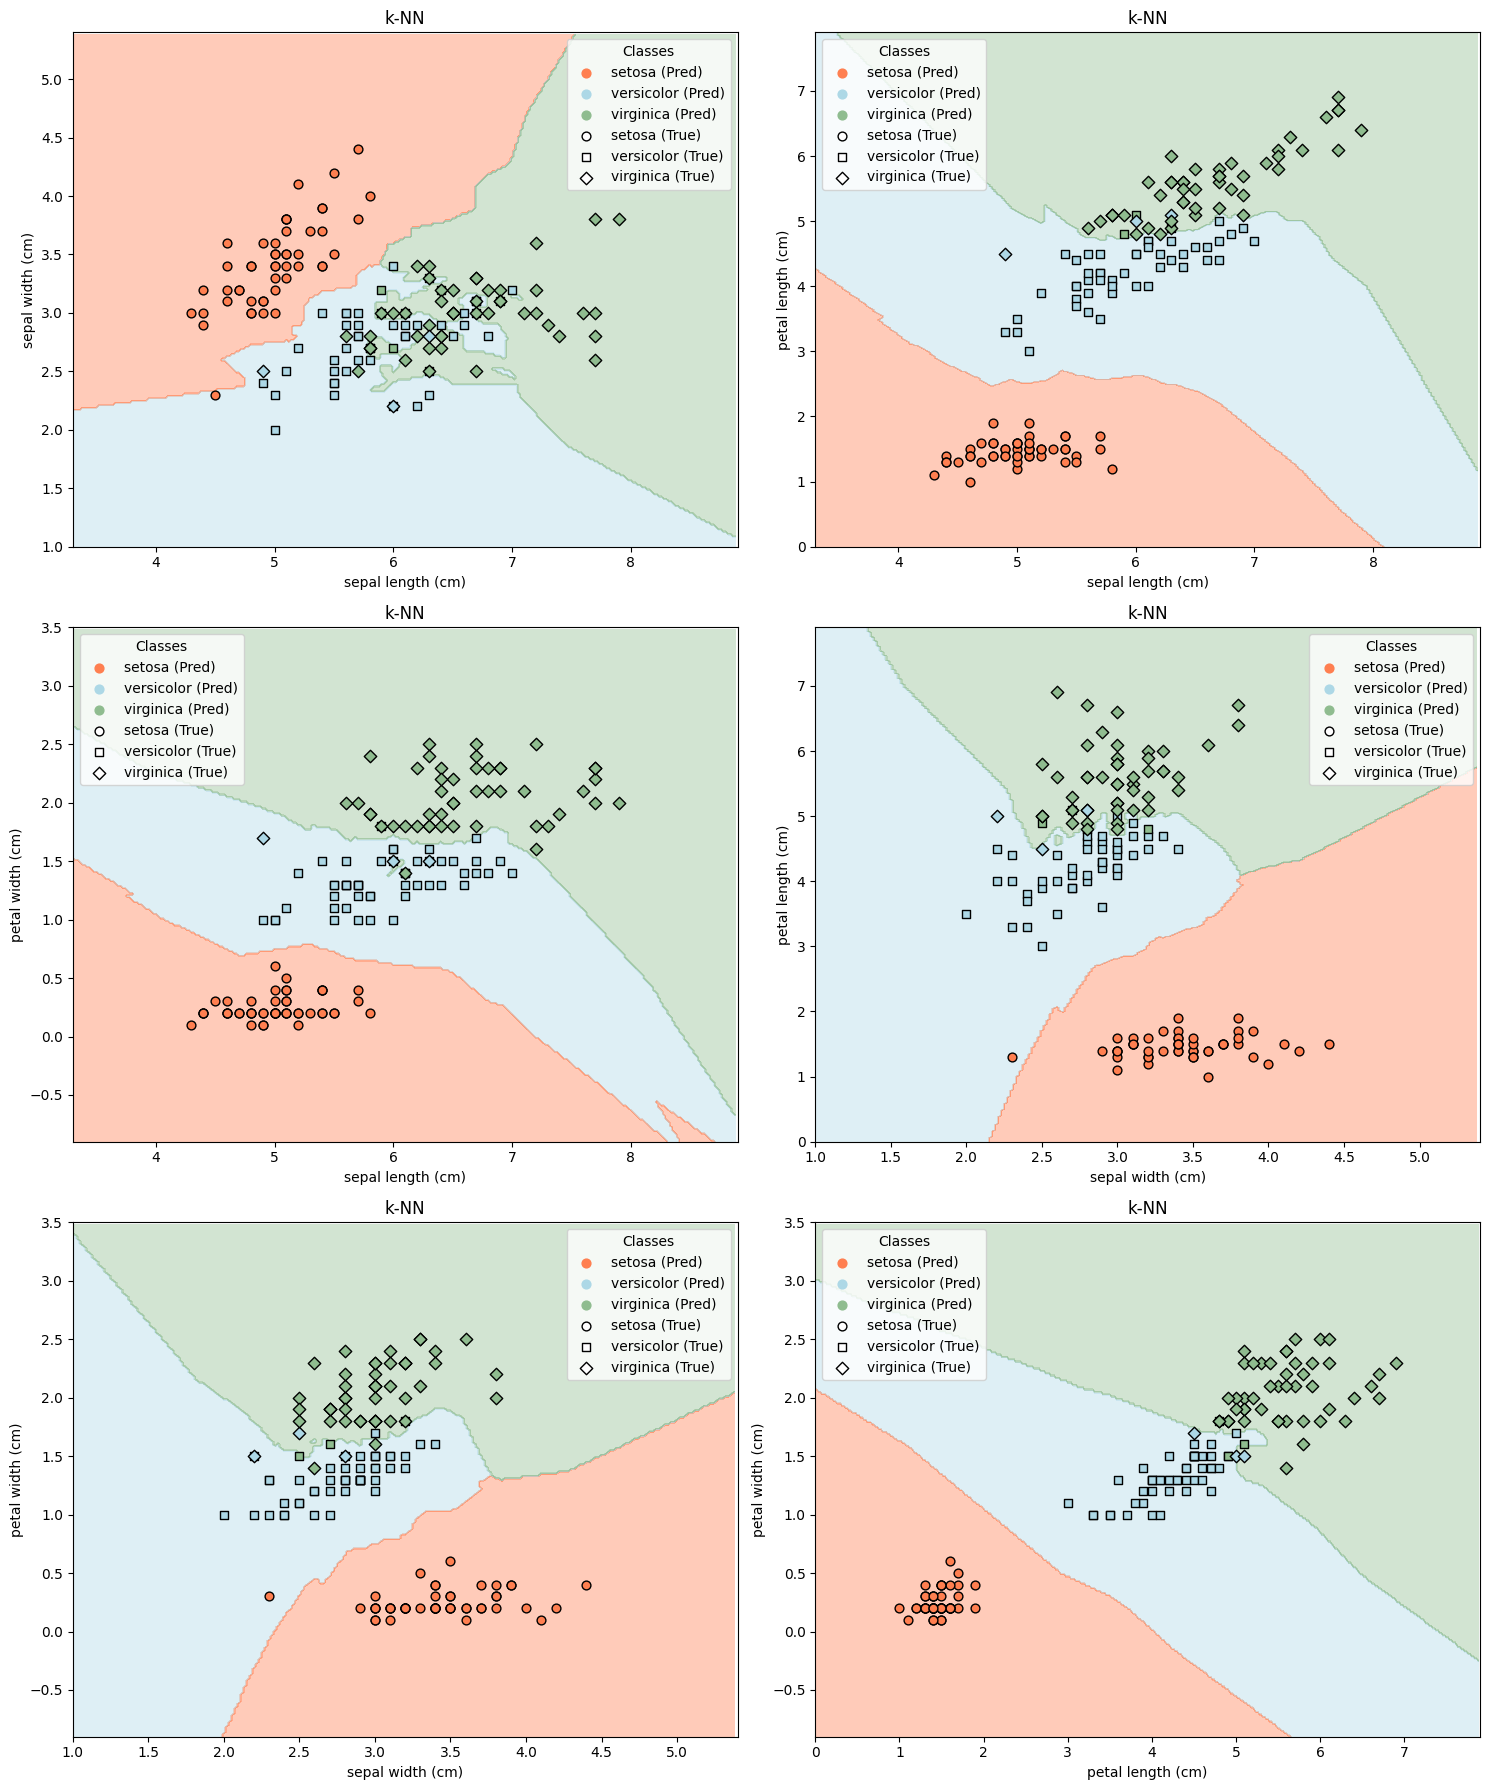

In [222]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
class_names = iris.target_names  # Class names (Setosa, Versicolor, Virginica)

# Define the classifier
knn = KNeighborsClassifier(n_neighbors=3)

# List of unique pairs of explanatory variables
pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

# Colors and marker shapes
colours = ('coral', 'lightblue', 'darkseagreen')  # Colors for predicted classes
markers = ['o', 's', 'D']  # Different shapes for true classes (circle, square, diamond)

# Setup mesh grid for plotting decision boundaries
def plot_decision_boundary(X, y, model, ax, feature_x, feature_y, title, y_pred):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Standardize features for the model
    scaler = StandardScaler()
    X_std = scaler.fit_transform(X)

    # Fit the model on this feature pair
    model.fit(X_std, y)
    
    # Predict the class for every point in the mesh grid
    Z = model.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    ax.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(colours))
    
    # Plot the actual data points with real class labels (shapes indicate real classes)
    for i, point in enumerate(X):
        ax.scatter(point[0], point[1], 
                   c=np.array([colours[y_pred[i]]]), edgecolors='k', marker=markers[y[i]], s=40)
    

    for i, class_idx in enumerate(np.unique(y_pred)):
        ax.scatter(-10, -10, s=40,
                   c=[colours[class_idx]], label=class_names[class_idx] + " (Pred)")
        
        
    for i, class_idx in enumerate(np.unique(y)):
        ax.scatter(-10, -10, s=40,
                   marker=markers[class_idx], c=['white'], edgecolors='k', label=class_names[class_idx] + " (True)")
        
    # Add labels and title
    ax.set_xlabel(feature_x)
    ax.set_ylabel(feature_y)
    ax.set_title(title)

        # Set axis limits
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    
    # Create a legend with true class labels
    ax.legend(title="Classes")



# Plot decision boundaries for each pair of features
fig, axes = plt.subplots(3, 2, figsize=(15, 18))

knn.fit(X, y)
y_pred = knn.predict(X)

for i, (p1, p2) in enumerate(pairs):
    X_pair = X[:, [p1, p2]]  # Select the feature pair
    row, col = divmod(i, 2)
    
    # Logistic Regression plot
    plot_decision_boundary(X_pair, y, knn, axes[row, col], feature_names[p1], feature_names[p2], 'k-NN', y_pred)

# Show plot
plt.tight_layout()
plt.show()


## f)

In [223]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

np.random.seed(412)


# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features
y = iris.target  # Target classes

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 1. Probability-based classifier: Logistic Regression
log_reg = LogisticRegression(multi_class='multinomial', max_iter=200)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# 2. Non-probability-based classifier: k-Nearest Neighbors (k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Evaluating performance of both classifiers
results = {
    "Logistic Regression Accuracy": accuracy_score(y_test, y_pred_log_reg),
    "K-Nearest Neighbors Accuracy": accuracy_score(y_test, y_pred_knn),
    "Logistic Regression Confusion Matrix": confusion_matrix(y_test, y_pred_log_reg),
    "K-Nearest Neighbors Confusion Matrix": confusion_matrix(y_test, y_pred_knn),
    "Logistic Regression Report": classification_report(y_test, y_pred_log_reg, target_names=iris.target_names),
    "K-Nearest Neighbors Report": classification_report(y_test, y_pred_knn, target_names=iris.target_names)
}

results

/home/timryall/repos/uq/STAT3006/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


{'Logistic Regression Accuracy': 0.9111111111111111,
 'K-Nearest Neighbors Accuracy': 0.9111111111111111,
 'Logistic Regression Confusion Matrix': array([[15,  0,  0],
        [ 0, 14,  1],
        [ 0,  3, 12]]),
 'K-Nearest Neighbors Confusion Matrix': array([[15,  0,  0],
        [ 0, 15,  0],
        [ 0,  4, 11]]),
 'Logistic Regression Report': '              precision    recall  f1-score   support\n\n      setosa       1.00      1.00      1.00        15\n  versicolor       0.82      0.93      0.88        15\n   virginica       0.92      0.80      0.86        15\n\n    accuracy                           0.91        45\n   macro avg       0.92      0.91      0.91        45\nweighted avg       0.92      0.91      0.91        45\n',
 'K-Nearest Neighbors Report': '              precision    recall  f1-score   support\n\n      setosa       1.00      1.00      1.00        15\n  versicolor       0.79      1.00      0.88        15\n   virginica       1.00      0.73      0.85        15\n

fitting
complete
pointing 0
pointing 1
pointing 2
pointing 3
pointing 4
pointing 5
pointing 6
pointing 7
pointing 8
pointing 9
pointing 10
pointing 11
pointing 12
pointing 13
pointing 14
pointing 15
pointing 16
pointing 17
pointing 18
pointing 19
pointing 20
pointing 21
pointing 22
pointing 23
pointing 24
pointing 25
pointing 26
pointing 27
pointing 28
pointing 29
pointing 30
pointing 31
pointing 32
pointing 33
pointing 34
pointing 35
pointing 36
pointing 37
pointing 38
pointing 39
pointing 40
pointing 41
pointing 42
pointing 43
pointing 44
pointing 45
pointing 46
pointing 47
pointing 48
pointing 49
pointing 50
pointing 51
pointing 52
pointing 53
pointing 54
pointing 55
pointing 56
pointing 57
pointing 58
pointing 59
pointing 60
pointing 61
pointing 62
pointing 63
pointing 64
pointing 65
pointing 66
pointing 67
pointing 68
pointing 69
pointing 70
pointing 71
pointing 72
pointing 73
pointing 74
pointing 75
pointing 76
pointing 77
pointing 78
pointing 79
pointing 80
pointing 81
pointing 

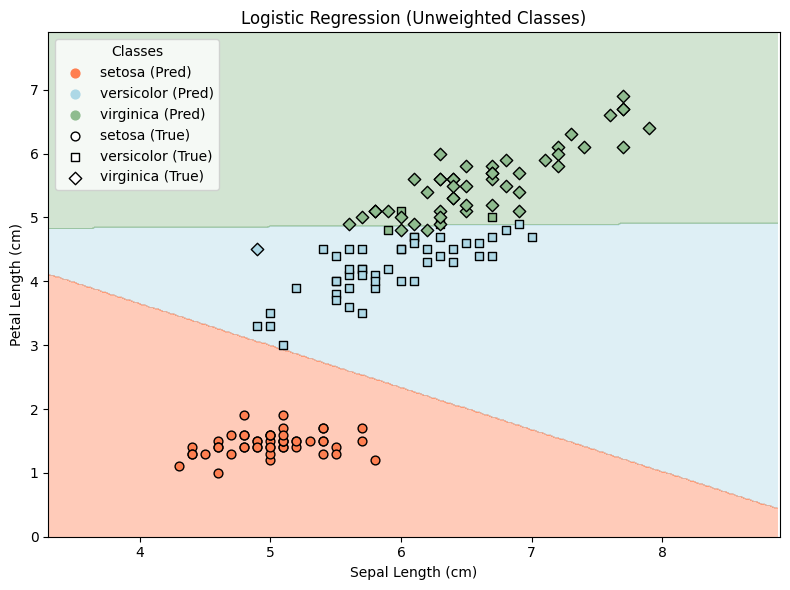

In [236]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

# Load Iris dataset
iris = load_iris()
X = iris.data[:, :4]  # Use only the first two features
y = iris.target
class_names = iris.target_names  # Class names (Setosa, Versicolor, Virginica)

# Colors and marker shapes
colours = ('coral', 'lightblue', 'darkseagreen')  # Colors for predicted classes
markers = ['o', 's', 'D']  # Different shapes for true classes (circle, square, diamond)

# Setup mesh grid for plotting decision boundaries
def plot_decision_boundary(X, y, model, ax, title, y_pred):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Standardize features for the model
    scaler = StandardScaler()
    X_std = scaler.fit_transform(X)

    # Fit the model
    print('fitting')
    model.fit(X_std, y)
    print('complete')

    
    # Predict the class for every point in the mesh grid
    Z = model.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    ax.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(colours))
    
    # Plot the actual data points with real class labels (shapes indicate real classes)
    for i, point in enumerate(X):
        print('pointing',i)
        ax.scatter(point[0], point[1], 
                   c=np.array([colours[y_pred[i]]]), edgecolors='k', marker=markers[y[i]], s=40)

    # Add predicted and true classes to the legend
    for i, class_idx in enumerate(np.unique(y_pred)):
        ax.scatter(-10, -10, s=40,
                   c=[colours[class_idx]], label=class_names[class_idx] + " (Pred)")
        
    for i, class_idx in enumerate(np.unique(y)):
        ax.scatter(-10, -10, s=40,
                   marker=markers[class_idx], c=['white'], edgecolors='k', label=class_names[class_idx] + " (True)")
        
    # Add labels and title
    ax.set_xlabel('Sepal Length (cm)')
    ax.set_ylabel('Petal Length (cm)')
    ax.set_title(title)

    # Set axis limits
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    
    # Create a legend with true class labels
    ax.legend(title="Classes")

fig, axes = plt.subplots(1, 1, figsize=(8, 6))
model = LogisticRegression(max_iter=200)
model.fit(X, y)
plot_decision_boundary(X[:, [0,2]], y, model, axes, f'Logistic Regression (Unweighted Classes)', model.predict(X))

# Show plot
plt.tight_layout()
plt.show()

fitting
complete
pointing 0
pointing 1
pointing 2
pointing 3
pointing 4
pointing 5
pointing 6
pointing 7
pointing 8
pointing 9
pointing 10
pointing 11
pointing 12
pointing 13
pointing 14
pointing 15
pointing 16
pointing 17
pointing 18
pointing 19
pointing 20
pointing 21
pointing 22
pointing 23
pointing 24
pointing 25
pointing 26
pointing 27
pointing 28
pointing 29
pointing 30
pointing 31
pointing 32
pointing 33
pointing 34
pointing 35
pointing 36
pointing 37
pointing 38
pointing 39
pointing 40
pointing 41
pointing 42
pointing 43
pointing 44
pointing 45
pointing 46
pointing 47
pointing 48
pointing 49
pointing 50
pointing 51
pointing 52
pointing 53
pointing 54
pointing 55
pointing 56
pointing 57
pointing 58
pointing 59
pointing 60
pointing 61
pointing 62
pointing 63
pointing 64
pointing 65
pointing 66
pointing 67
pointing 68
pointing 69
pointing 70
pointing 71
pointing 72
pointing 73
pointing 74
pointing 75
pointing 76
pointing 77
pointing 78
pointing 79
pointing 80
pointing 81
pointing 

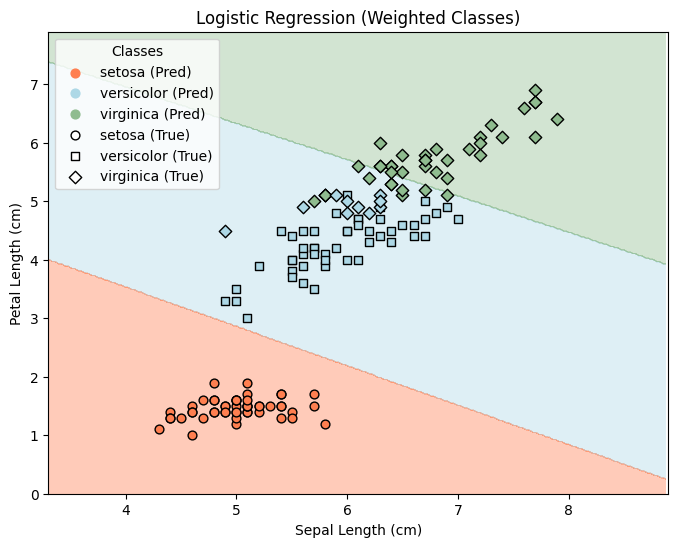

In [237]:
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
model = LogisticRegression(max_iter=200, class_weight={0: 0.3, 1: 0.5, 2: 0.2})
model.fit(X, y)
plot_decision_boundary(X[:, [0,2]], y, model, axes, f'Logistic Regression (Weighted Classes)', model.predict(X))

fitting
complete
pointing 0
pointing 1
pointing 2
pointing 3
pointing 4
pointing 5
pointing 6
pointing 7
pointing 8
pointing 9
pointing 10
pointing 11
pointing 12
pointing 13
pointing 14
pointing 15
pointing 16
pointing 17
pointing 18
pointing 19
pointing 20
pointing 21
pointing 22
pointing 23
pointing 24
pointing 25
pointing 26
pointing 27
pointing 28
pointing 29
pointing 30
pointing 31
pointing 32
pointing 33
pointing 34
pointing 35
pointing 36
pointing 37
pointing 38
pointing 39
pointing 40
pointing 41
pointing 42
pointing 43
pointing 44
pointing 45
pointing 46
pointing 47
pointing 48
pointing 49
pointing 50
pointing 51
pointing 52
pointing 53
pointing 54
pointing 55
pointing 56
pointing 57
pointing 58
pointing 59
pointing 60
pointing 61
pointing 62
pointing 63
pointing 64
pointing 65
pointing 66
pointing 67
pointing 68
pointing 69
pointing 70
pointing 71
pointing 72
pointing 73
pointing 74
pointing 75
pointing 76
pointing 77
pointing 78
pointing 79
pointing 80
pointing 81
pointing 

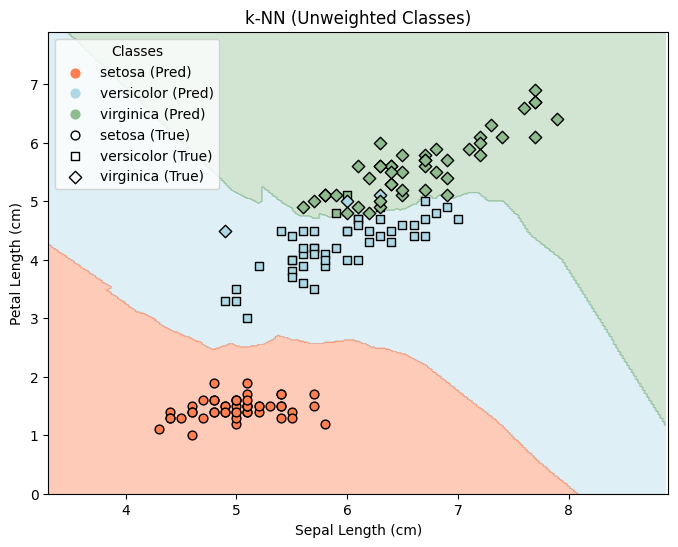

In [238]:
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X, y)
plot_decision_boundary(X[:, [0,2]], y, model, axes, f'k-NN (Unweighted Classes)', model.predict(X))

[array([5.1, 3.5, 1.4, 0.2]), array([5.1, 3.5, 1.4, 0.2]), array([5.1, 3.5, 1.4, 0.2]), array([4.9, 3. , 1.4, 0.2]), array([4.9, 3. , 1.4, 0.2]), array([4.9, 3. , 1.4, 0.2]), array([4.7, 3.2, 1.3, 0.2]), array([4.7, 3.2, 1.3, 0.2]), array([4.7, 3.2, 1.3, 0.2]), array([4.6, 3.1, 1.5, 0.2]), array([4.6, 3.1, 1.5, 0.2]), array([4.6, 3.1, 1.5, 0.2]), array([5. , 3.6, 1.4, 0.2]), array([5. , 3.6, 1.4, 0.2]), array([5. , 3.6, 1.4, 0.2]), array([5.4, 3.9, 1.7, 0.4]), array([5.4, 3.9, 1.7, 0.4]), array([5.4, 3.9, 1.7, 0.4]), array([4.6, 3.4, 1.4, 0.3]), array([4.6, 3.4, 1.4, 0.3]), array([4.6, 3.4, 1.4, 0.3]), array([5. , 3.4, 1.5, 0.2]), array([5. , 3.4, 1.5, 0.2]), array([5. , 3.4, 1.5, 0.2]), array([4.4, 2.9, 1.4, 0.2]), array([4.4, 2.9, 1.4, 0.2]), array([4.4, 2.9, 1.4, 0.2]), array([4.9, 3.1, 1.5, 0.1]), array([4.9, 3.1, 1.5, 0.1]), array([4.9, 3.1, 1.5, 0.1]), array([5.4, 3.7, 1.5, 0.2]), array([5.4, 3.7, 1.5, 0.2]), array([5.4, 3.7, 1.5, 0.2]), array([4.8, 3.4, 1.6, 0.2]), array([4.8, 3

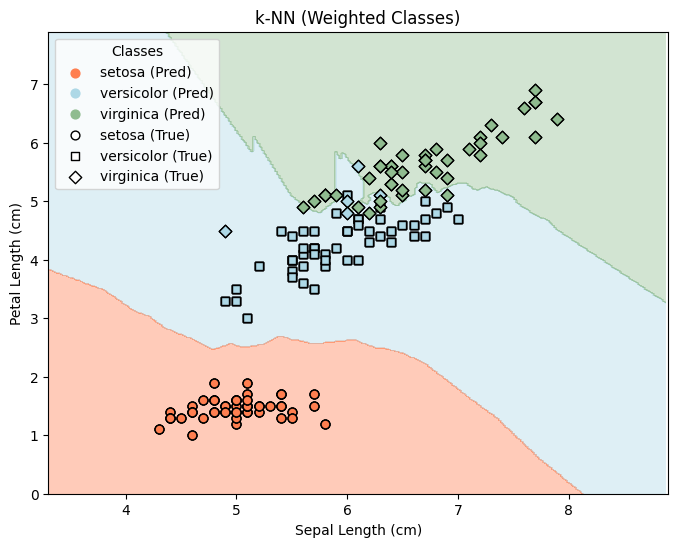

In [239]:
class_weights = {0: 0.3, 1: 0.5, 2: 0.2}

X_prop = []
y_prop = []

for i, point in enumerate(X):
    for _ in range(int(class_weights[y[i]] * 10)):
        X_prop.append(point)
        y_prop.append(y[i])


from collections import Counter

print(X_prop)
print(Counter(y_prop))

fig, axes = plt.subplots(1, 1, figsize=(8, 6))
# We need to increase k in proportion
model = KNeighborsClassifier(n_neighbors=int(3 *  (len(y_prop) / len(y))))
model.fit(X_prop, y_prop)
plot_decision_boundary(np.array(X_prop)[:, [0,2]], y_prop, model, axes, f'k-NN (Weighted Classes)', model.predict(X_prop))

In [228]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

np.random.seed(412)


# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features
y = iris.target  # Target classes

# Standardizing the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

#  Probability-based classifier: Logistic Regression
log_reg = LogisticRegression(multi_class='multinomial', max_iter=200, class_weight={0: 0.3, 1: 0.5, 2: 0.2})
log_reg.fit(X, y)
y_pred_log_reg = log_reg.predict(X)


X_prop = []
y_prop = []

for i, point in enumerate(X):
    for _ in range(int(class_weights[y[i]] * 10)):
        X_prop.append(point)
        y_prop.append(y[i])

X_prop=np.array(X_prop)
y_prop=np.array(y_prop)


knn = KNeighborsClassifier(n_neighbors=int(3 *  (len(y_prop) / len(y))))
knn.fit(X_prop, y_prop)
y_pred_knn = knn.predict(X)


print(Counter(y_pred_knn))

Counter({np.int64(1): 54, np.int64(0): 50, np.int64(2): 46})


/home/timryall/repos/uq/STAT3006/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [235]:
X_df = pd.DataFrame(iris.data, columns=iris.feature_names)
X_df['True Class'] = y

# Logistic Regression: Extracting parameter estimates (coefficients)
log_reg_coefficients = pd.DataFrame(log_reg.coef_, columns=iris.feature_names, index=iris.target_names)
log_reg_coefficients['Intercept'] = log_reg.intercept_
X_df['Predicted Class (LG)'] = y_pred_log_reg

# k-NN: Summarizing the observations classified into each class
X_df['Predicted Class (k-NN)'] = y_pred_knn

# Numerical summary of the features for each predicted class (mean and std dev)
knn_summary = X_df.groupby('Predicted Class (k-NN)').agg(['mean', 'std']).reset_index()
lg_summary = X_df.groupby('Predicted Class (LG)').agg(['mean', 'std']).reset_index()


#  log_reg_coefficients
lg_summary

Predicted Class (LG) sepal length (cm)           sepal width (cm)            \
                                    mean       std             mean       std   
0                    0          5.006000  0.352490         3.428000  0.379064   
1                    1          5.942373  0.500415         2.764407  0.305559   
2                    2          6.721951  0.597291         3.026829  0.311468   

  petal length (cm)           petal width (cm)           True Class            \
               mean       std             mean       std       mean       std   
0          1.462000  0.173664         0.246000  0.105386   0.000000  0.000000   
1          4.367797  0.514427         1.379661  0.230277   1.152542  0.362632   
2          5.680488  0.510989         2.102439  0.231827   2.000000  0.000000   

  Predicted Class (k-NN)            
                    mean       std  
0               0.000000  0.000000  
1               1.084746  0.280894  
2               2.000000  0.000000

In [230]:
from collections import Counter

print(f"{Counter(y_pred_log_reg)=}")
print(f"{Counter(y_pred_knn)=}")

lg_prop  = {clas: coun / len(y_pred_log_reg) for clas, coun in Counter(y_pred_log_reg).items()}
knn_prop  = {clas: coun / len(y_pred_knn) for clas, coun in Counter(y_pred_knn).items()}

print(f"{lg_prop=}")
print(f"{knn_prop=}")

Counter(y_pred_log_reg)=Counter({np.int64(1): 59, np.int64(0): 50, np.int64(2): 41})
Counter(y_pred_knn)=Counter({np.int64(1): 54, np.int64(0): 50, np.int64(2): 46})
lg_prop={np.int64(0): 0.3333333333333333, np.int64(1): 0.3933333333333333, np.int64(2): 0.2733333333333333}
knn_prop={np.int64(0): 0.3333333333333333, np.int64(1): 0.36, np.int64(2): 0.30666666666666664}
